In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import pandas as pd 

sns.set_palette ("Set1")
sns.set_style ("ticks")
sns.set_context("paper")

In [6]:
iceI = pd.read_csv('../Data/reference_data/salzman/IceI.txt',delimiter='\t',header=None).to_numpy()[:,::-1]    
iceIII=pd.read_csv('../Data/reference_data/salzman/IceIII.txt',delimiter='\t',header=None).to_numpy()[:,::-1]
iceV=pd.read_csv('../Data/reference_data/salzman/IceV.txt',delimiter='\t',header=None,na_values='--').to_numpy()[:,::-1]
iceVI=pd.read_csv('../Data/reference_data/salzman/IceVI.txt',delimiter='\t',header=None).to_numpy()[:,::-1]
iceVII=pd.read_csv('../Data/reference_data/salzman/Ice VII and VIII.txt',delimiter='\t',header=None).to_numpy()[:,::-1]

iceI[:,::2]+=273.15
iceIII[:,::2]+=273.15
iceV[:,::2]+=273.15
iceVI[:,::2]+=273.15
iceVII[:,::2]+=273.15

atm_to_gpa = 0.000101325
iceI[:,1::2]*=9869.23*atm_to_gpa
iceIII[:,1::2]*=9869.23*atm_to_gpa
iceV[:,1::2]*=9869.23*atm_to_gpa
iceVI[:,1::2]*=9869.23*atm_to_gpa
iceVII[:,1::2]*=9869.23*atm_to_gpa

In [7]:
# Paesani: Quantum-phase-diagram-of-water
pdata_T = {}
pdata_P = {}
pdata_T['IceII'] = [244.62, 251.02, 254.43, 255.5,  256.58]
pdata_P['IceII'] = [0.20265,  0.303975, 0.4053,   0.506625, 0.60795 ]
pdata_T['IceIII'] = [247.39, 248.96, 250.5,  250.21]
pdata_P['IceIII'] = [0.20265,  0.303975, 0.506625, 0.60795 ]
pdata_T['IceV'] = [255.82, 260.26]
pdata_P['IceV'] = [0.506625, 0.60795 ]

# Melting points from NPH MD simulations of ice-liquid coexisting phases using MB-pol
data_T = {}
data_P = {}
data_err = {}
data_T['IceII'] = [250.5, 253.3,  255.9, 256.6, 256.7]
data_P['IceII'] = [0.2, 0.3, 0.4, 0.5, 0.6]
data_err['IceII'] = [1.8, 2.0, 1.8, 2.2, 1.6]

data_T['IceIII'] = [246.6, 249.2, 253.4]
data_P['IceIII'] = [0.2, 0.4, 0.6]
data_err['IceIII'] = [2.3, 2.0, 2.4]

data_T['IceV'] = [259.2, 261.4, 262.8]
data_P['IceV'] = [0.4, 0.5, 0.6]
data_err['IceV'] = [2.4, 2.1, 2.4]

# Melting points from NPH MD simulations of ice-liquid coexisting phases using SGPR-MPL
ml_data_P = {}
ml_data_T = {}
ml_data_err = {}
ml_data_T ['IceII'] = [254.9, 261.9]
ml_data_P ['IceII'] = [0.2, 0.6]
ml_data_err['IceII'] = [1.8, 1.6]

ml_data_T ['IceIII'] = [250.0, 255.3]
ml_data_P ['IceIII'] = [0.2, 0.6]
ml_data_err['IceIII'] = [1.8, 1.8]

ml_data_T ['IceV'] = [264.7, 268.4]
ml_data_P ['IceV'] = [0.4,   0.6]
ml_data_err['IceV'] = [2.0,  2.2]


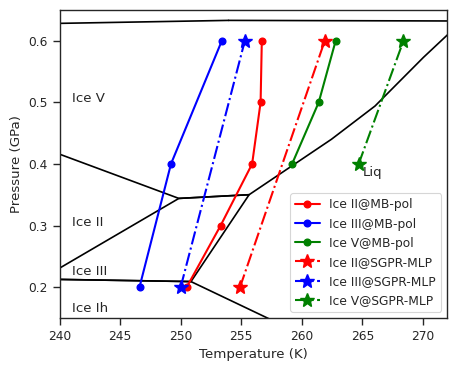

In [8]:
fig, (ax2) = plt.subplots (ncols=1, figsize=(5,4))


ax2.plot (iceI[:,2],iceI[:,3], 'k')
ax2.plot(iceI[:,4],iceI[:,5],'k')

ax2.plot(iceIII[:,0],iceIII[:,1],'k')
ax2.plot(iceV[:,0],iceV[:,1],'k')
ax2.plot(iceV[:,2],iceV[:,3],'k')



ax2.plot (data_T['IceII'], data_P['IceII'], color='red', marker='o',  linestyle='-', linewidth=1.5, label='Ice II@MB-pol')
ax2.plot (data_T['IceIII'], data_P['IceIII'], color='blue', marker='o',  linestyle='-', linewidth=1.5, label='Ice III@MB-pol')
ax2.plot (data_T['IceV'], data_P['IceV'], color='green', marker='o', linestyle='-', linewidth=1.5, label='Ice V@MB-pol')

ax2.plot (ml_data_T['IceII'], ml_data_P['IceII'], color='red', marker='*', markersize=10, linestyle='dashdot', linewidth=1.5, label='Ice II@SGPR-MLP')
ax2.plot (ml_data_T['IceIII'], ml_data_P['IceIII'], color='blue', marker='*', markersize=10, linestyle='dashdot', linewidth=1.5, label='Ice III@SGPR-MLP')
ax2.plot (ml_data_T['IceV'], ml_data_P['IceV'], color='green', marker='*', markersize=10, linestyle='dashdot', linewidth=1.5, label='Ice V@SGPR-MLP')


ax2.set_xlim((240,272))
ax2.set_ylim((0.15,0.65))
ax2.set_xlabel('Temperature (K)')
ax2.set_ylabel('Pressure (GPa)')

ax2.text (241, 0.3, 'Ice II')
ax2.text (241, 0.22, 'Ice III')
ax2.text (241, 0.5, 'Ice V')
ax2.text (265, 0.38, 'Liq')
ax2.text (241, 0.16, 'Ice Ih')
ax2.legend()

#sns.despine()
#plt.tight_layout (w_pad=1.0)
plt.savefig ('fig_coex_lines.pdf', dpi=600)

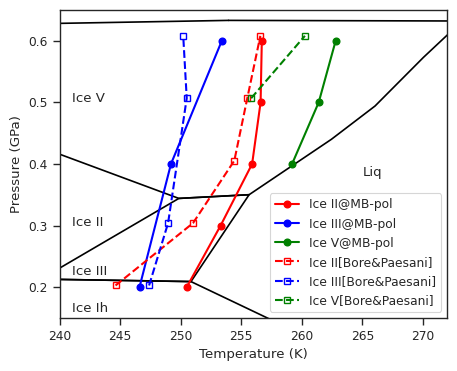

In [9]:
fig, (ax1) = plt.subplots (ncols=1, figsize=(5,4))

ax1.plot (iceI[:,2],iceI[:,3], 'k')
ax1.plot(iceI[:,4],iceI[:,5],'k')

ax1.plot(iceIII[:,0],iceIII[:,1],'k')
ax1.plot(iceV[:,0],iceV[:,1],'k')
ax1.plot(iceV[:,2],iceV[:,3],'k')



ax1.plot (data_T['IceII'], data_P['IceII'], color='red', marker='o',  linestyle='-', linewidth=1.5, label='Ice II@MB-pol')
ax1.plot (data_T['IceIII'], data_P['IceIII'], color='blue', marker='o',  linestyle='-', linewidth=1.5, label='Ice III@MB-pol')
ax1.plot (data_T['IceV'], data_P['IceV'], color='green', marker='o', linestyle='-', linewidth=1.5, label='Ice V@MB-pol')

ax1.plot (pdata_T['IceII'], pdata_P['IceII'], color='red', marker='s', fillstyle='none', linestyle='dashed', linewidth=1.5, label='Ice II[Bore&Paesani]')
ax1.plot (pdata_T['IceIII'], pdata_P['IceIII'], color='blue', marker='s', fillstyle='none', linestyle='dashed', linewidth=1.5, label='Ice III[Bore&Paesani]')
ax1.plot (pdata_T['IceV'], pdata_P['IceV'], color='green', marker='s', fillstyle='none', linestyle='dashed', linewidth=1.5, label='Ice V[Bore&Paesani]')
# remove other phases from the experimental phase diagram

ax1.set_xlim((240,272))
ax1.set_ylim((0.15,0.65))
ax1.set_xlabel('Temperature (K)')
ax1.set_ylabel('Pressure (GPa)')

ax1.text (241, 0.3, 'Ice II')
ax1.text (241, 0.22, 'Ice III')
ax1.text (241, 0.5, 'Ice V')
ax1.text (265, 0.38, 'Liq')
ax1.text (241, 0.16, 'Ice Ih')
ax1.legend()

plt.savefig ('fig_SI_coex_lines.pdf', dpi=600)

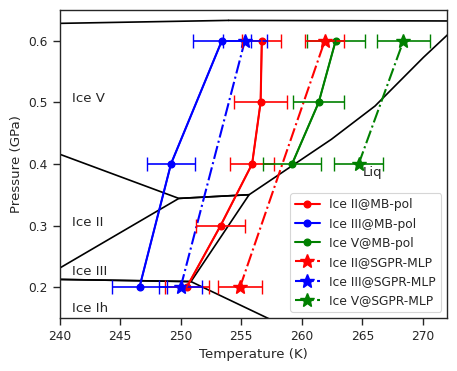

In [10]:
fig, (ax2) = plt.subplots (ncols=1, figsize=(5,4))


ax2.plot (iceI[:,2],iceI[:,3], 'k')
ax2.plot(iceI[:,4],iceI[:,5],'k')

ax2.plot(iceIII[:,0],iceIII[:,1],'k')
ax2.plot(iceV[:,0],iceV[:,1],'k')
ax2.plot(iceV[:,2],iceV[:,3],'k')



ax2.plot (data_T['IceII'], data_P['IceII'], color='red', marker='o',  linestyle='-', linewidth=1.5, label='Ice II@MB-pol')
ax2.plot (data_T['IceIII'], data_P['IceIII'], color='blue', marker='o',  linestyle='-', linewidth=1.5, label='Ice III@MB-pol')
ax2.plot (data_T['IceV'], data_P['IceV'], color='green', marker='o', linestyle='-', linewidth=1.5, label='Ice V@MB-pol')

ax2.plot (ml_data_T['IceII'], ml_data_P['IceII'], color='red', marker='*', markersize=10, linestyle='dashdot', linewidth=1.5, label='Ice II@SGPR-MLP')
ax2.plot (ml_data_T['IceIII'], ml_data_P['IceIII'], color='blue', marker='*', markersize=10, linestyle='dashdot', linewidth=1.5, label='Ice III@SGPR-MLP')
ax2.plot (ml_data_T['IceV'], ml_data_P['IceV'], color='green', marker='*', markersize=10, linestyle='dashdot', linewidth=1.5, label='Ice V@SGPR-MLP')

plt.errorbar (data_T['IceII'], data_P['IceII'], xerr=data_err['IceII'], color='red', capsize=5)
plt.errorbar (data_T['IceIII'], data_P['IceIII'], xerr=data_err['IceIII'], color='blue', capsize=5)
plt.errorbar (data_T['IceV'], data_P['IceV'], xerr=data_err['IceV'], color='green', capsize=5)


plt.errorbar (ml_data_T['IceII'], ml_data_P['IceII'], xerr=ml_data_err['IceII'], color='red', fmt='*', capsize=5)
plt.errorbar (ml_data_T['IceIII'], ml_data_P['IceIII'], xerr=ml_data_err['IceIII'], color='blue', fmt='*', capsize=5)
plt.errorbar (ml_data_T['IceV'], ml_data_P['IceV'], xerr=ml_data_err['IceV'], color='green', fmt='*', capsize=5)

ax2.set_xlim((240,272))
ax2.set_ylim((0.15,0.65))
ax2.set_xlabel('Temperature (K)')
ax2.set_ylabel('Pressure (GPa)')

ax2.text (241, 0.3, 'Ice II')
ax2.text (241, 0.22, 'Ice III')
ax2.text (241, 0.5, 'Ice V')
ax2.text (265, 0.38, 'Liq')
ax2.text (241, 0.16, 'Ice Ih')
ax2.legend()

plt.savefig ('fig_coex_lines_with_errors.pdf', dpi=600)

In [12]:
def read_data (fname):
    lines = open(fname,'r').readlines()

    data = {'time(ps)': [],
            'H(eV)': [],
            'Etot(eV)' : [],
            'Epot' : [],
            'T': [],
            'box_z' : [],
            'P_z' : []}
    for line in lines[1::100]:
        words = line.split()
        data['time(ps)'].append (float(words[0]))
        data['H(eV)'].append (float(words[1]))
        data['Etot(eV)'].append (float(words[2]))
        data['Epot'].append (float(words[3]))
        data['T'].append (float(words[5]))
        data['box_z'].append (float (words[-1]))
        data['P_z'].append (-float(words[8]))

    return data

data_p02 = read_data ('../Data/ice_liquid/Ice2_P02/md_bcm_nph.dat')
data_p06 = read_data ('../Data/ice_liquid/Ice2_P06/md_bcm_nph.dat')

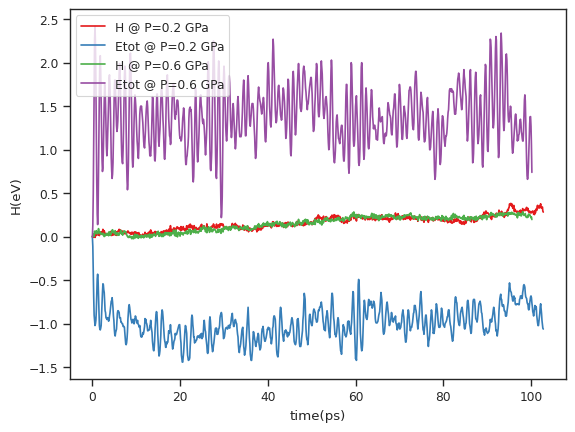

In [13]:
data_p02['H(eV)'] = np.array(data_p02['H(eV)'])
data_p02['H(eV)'] -= data_p02['H(eV)'][0]
data_p02['Etot(eV)'] = np.array(data_p02['Etot(eV)'])
data_p02['Etot(eV)'] -= data_p02['Etot(eV)'][0]
ax = sns.lineplot (data=data_p02, x='time(ps)', y='H(eV)', label='H @ P=0.2 GPa')
ax = sns.lineplot (data=data_p02, x='time(ps)', y='Etot(eV)', label='Etot @ P=0.2 GPa')

data_p06['H(eV)'] = np.array(data_p06['H(eV)'])
data_p06['H(eV)'] -= data_p06['H(eV)'][0]
data_p06['Etot(eV)'] = np.array(data_p06['Etot(eV)'])
data_p06['Etot(eV)'] -= data_p06['Etot(eV)'][0]
ax = sns.lineplot (data=data_p06, x='time(ps)', y='H(eV)', label='H @ P=0.6 GPa')
ax = sns.lineplot (data=data_p06, x='time(ps)', y='Etot(eV)', label='Etot @ P=0.6 GPa')

#plt.savefig ('fig_T_H.pdf',dpi=600)

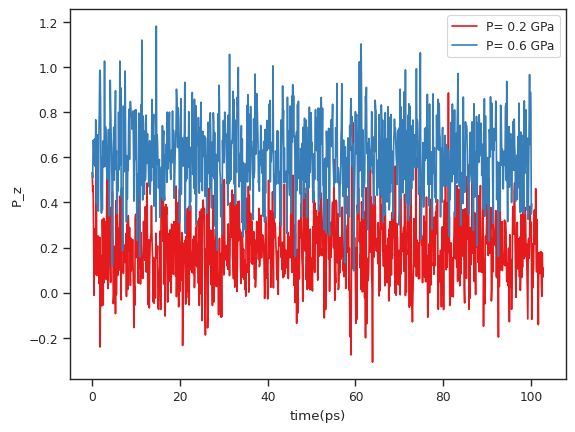

In [14]:
ax = sns.lineplot (data=data_p02, x='time(ps)', y='P_z', label='P= 0.2 GPa')
ax = sns.lineplot (data=data_p06, x='time(ps)', y='P_z', label='P= 0.6 GPa')

#plt.savefig ('fig_Ice2_P.pdf',dpi=600)

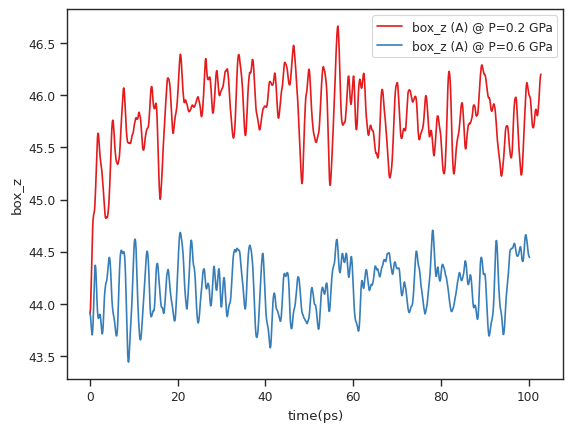

In [15]:
ax = sns.lineplot (data=data_p02, x='time(ps)', y='box_z', label='box_z (A) @ P=0.2 GPa')
ax = sns.lineplot (data=data_p06, x='time(ps)', y='box_z', label='box_z (A) @ P=0.6 GPa')

#plt.savefig ('fig_Ice2_box.pdf',dpi=600)

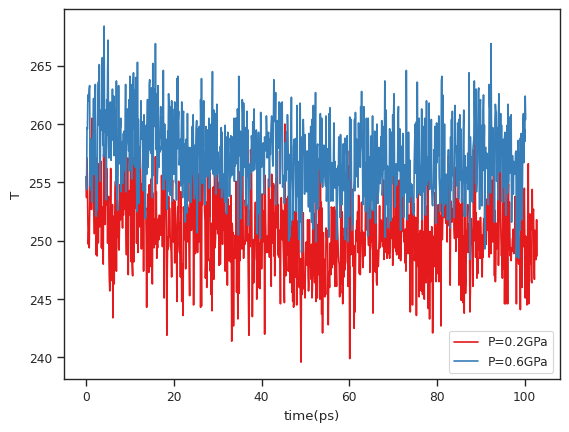

In [16]:
ax = sns.lineplot (data=data_p02, x='time(ps)', y='T', label='P=0.2GPa')
ax = sns.lineplot (data=data_p06, x='time(ps)', y='T', label='P=0.6GPa')

#plt.savefig ('fig_Ice2_T.pdf',dpi=600)

In [20]:
data_novirial = read_data ('../Data/active_npt/md_npt_novirial.dat')
data_virial = read_data ('../Data/active_npt/md_npt_virial.dat')

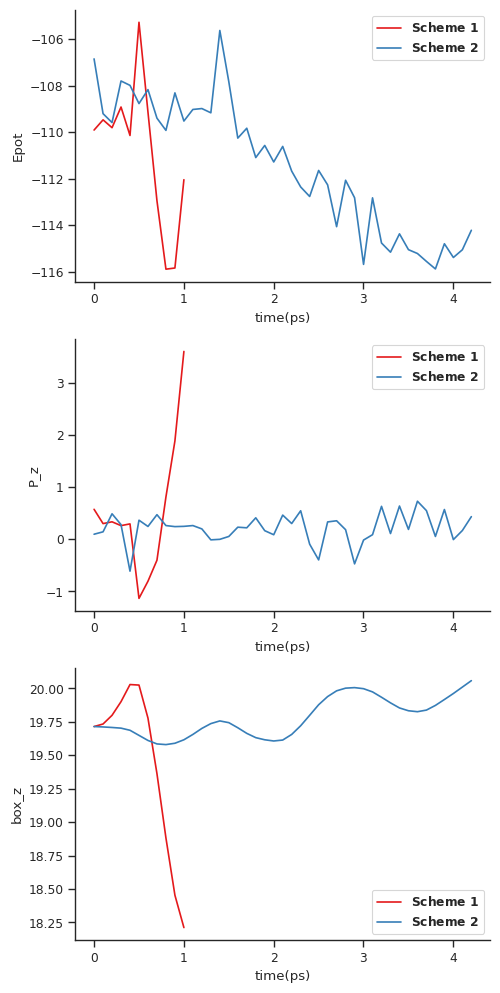

In [21]:
fig, (ax1,ax2,ax3) = plt.subplots (ncols=1, nrows=3, figsize=(5,10))

sns.lineplot (data=data_novirial, x='time(ps)', y='Epot', ax=ax1, label=r'$\mathbf{Scheme ~1}$')
sns.lineplot (data=data_virial, x='time(ps)', y='Epot', ax=ax1, label=r'$\mathbf{Scheme ~2}$')

sns.lineplot (data=data_novirial, x='time(ps)', y='P_z', ax=ax2, label=r'$\mathbf{Scheme ~1}$')
sns.lineplot (data=data_virial, x='time(ps)', y='P_z', ax=ax2, label=r'$\mathbf{Scheme ~2}$')

sns.lineplot (data=data_novirial, x='time(ps)', y='box_z', ax=ax3, label=r'$\mathbf{Scheme ~1}$')
sns.lineplot (data=data_virial, x='time(ps)', y='box_z', ax=ax3, label=r'$\mathbf{Scheme ~2}$')

sns.despine ()
plt.tight_layout (w_pad=1.0)
plt.subplots_adjust (left=0.15, right=0.98, bottom=0.05, top=0.98, wspace=0.2)
plt.savefig ('fig_SI_npt_virial.pdf', dpi=600)